In [1]:
# necessary libraries
import os
import pandas as pd
import numpy as np

# visualizations libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3

from keras.models import load_model, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, TensorBoard


from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# model evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
#from mlxtend.plotting import plot_confusion_matrix

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
base_dir= 'D:/work/tb/cxr/'
os.listdir(base_dir)

['normal', 'tb']

# <span style="color:blue; font-family:monospace;"> Explore Dataset </span>

In [4]:
tuberculosis_data= base_dir + 'tb/'
print("tuberculosis images :\n" ,os.listdir(tuberculosis_data)[:5])

normal_data= base_dir + 'normal/'
print("\nnormal images :\n" ,os.listdir(normal_data)[:5])

tuberculosis images :
 ['CHNCXR_0327_1.png', 'CHNCXR_0328_1.png', 'CHNCXR_0329_1.png', 'CHNCXR_0330_1.png', 'CHNCXR_0331_1.png']

normal images :
 ['CHNCXR_0001_0.png', 'CHNCXR_0002_0.png', 'CHNCXR_0003_0.png', 'CHNCXR_0004_0.png', 'CHNCXR_0005_0.png']


In [5]:
print("no. of tuberculosis images :" ,len(os.listdir(tuberculosis_data)))
print("\nno. of normal images :" ,len(os.listdir(normal_data)))

no. of tuberculosis images : 690

no. of normal images : 718


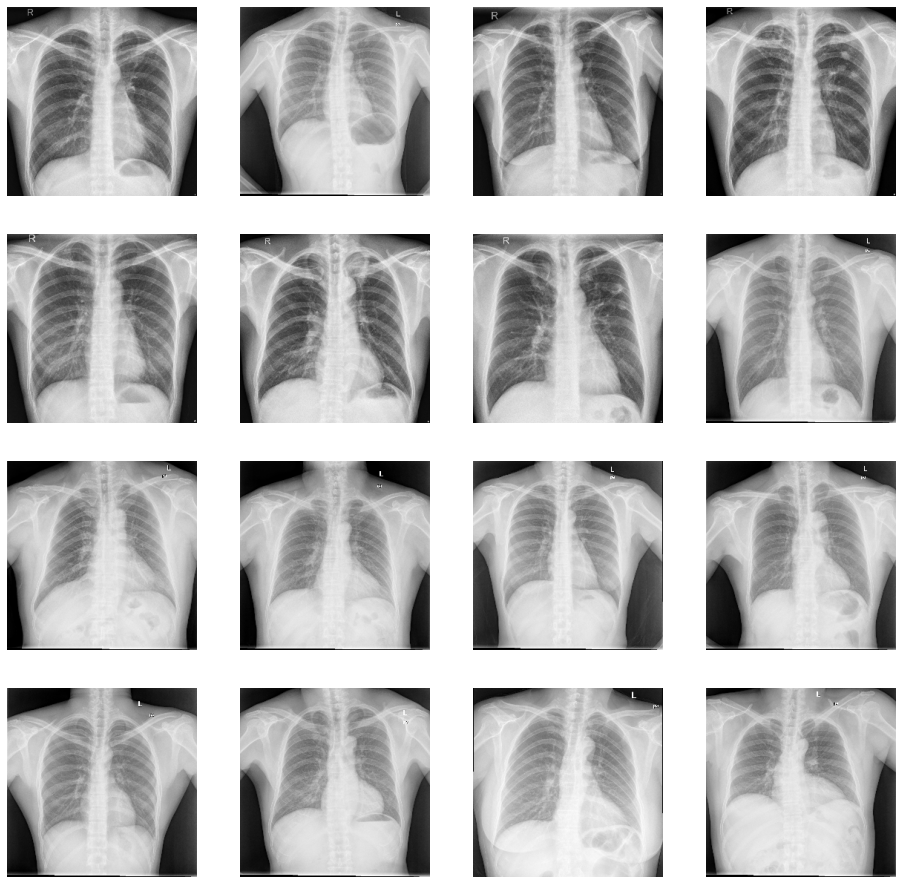

In [6]:
nrows= 4
ncols= 4
pic_index= 0

fig= plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8

tuberculosis_img = [os.path.join(tuberculosis_data, image) for image in os.listdir(tuberculosis_data)[pic_index-8:pic_index]]
normal_img = [os.path.join(normal_data, image) for image in os.listdir(normal_data)[pic_index-8:pic_index]]

for i, image_path in enumerate(tuberculosis_img+normal_img):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = mpimg.imread(image_path)
    plt.imshow(img)

plt.show()

# <span style="color:blue; font-family:monospace;"> Generating Train and Validation set using Data Augmentation </span>

In [ ]:
# generating training data
print("training data :")
train_datagen= ImageDataGenerator(rescale=1/255, zoom_range=0.3, rotation_range=50, width_shift_range= 0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest', validation_split = 0.2)

train_data = train_datagen.flow_from_directory(base_dir, 
                                              target_size= (256, 256),
                                              class_mode= "binary",
                                              batch_size=32,
                                              subset= "training"
                                              )

# genarating validation data
print("\nvalidation data :")
val_datagen= ImageDataGenerator(rescale= 1/255)

val_data= train_datagen.flow_from_directory(base_dir, 
                                              target_size= (256, 256),
                                              class_mode= "binary",
                                              batch_size=32,
                                              shuffle= False,
                                              subset= "validation"
                                              )

training data :
Found 1120 images belonging to 2 classes.

validation data :
Found 278 images belonging to 2 classes.


### <span style="color:blue; font-family:monospace;"> Class Labels </span>

In [ ]:
train_data.class_indices

In [ ]:
train_data.samples

In [ ]:
train_data.batch_size

# <span style="color:blue; font-family:monospace;"> Model Building </span>

## <span style="color:blue; font-family:monospace;"> Transfer Learning- InceptionV3 Model</span>

In [ ]:
#inception_model= InceptionV3(input_shape= (256, 256,3), include_top= False, weights='imagenet')

#last_output= inception_model.layers[-1].output


#last_output= Flatten()(last_output)


#pretrained_model= Model(inception_model.input, last_output)    

In [ ]:
# layer 1
#x= Dense(units=512, activation="relu")(last_output)
#x=Dropout(0.1)(x)

# layer 2
#x= Dense(units=128, activation="relu")(x)
#x=Dropout(0.1)(x)

# output layer
#x= Dense(units=1, activation="sigmoid")(x)

# final model
#model= Model(pretrained_model.input, x)

#model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 127, 127, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [ ]:
#model_1= Sequential()

#model_1.add(Conv2D(filters= 16, kernel_size=(3,3), activation="relu", input_shape=(256,256, 3)))
#model_1.add(MaxPooling2D(pool_size=(2,2)))

#model_1.add(Conv2D(filters= 32, kernel_size=(3,3), activation="relu"))
#model_1.add(MaxPooling2D(pool_size=(2,2)))

#model_1.add(Conv2D(filters= 64, kernel_size=(3,3), activation="relu"))
#model_1.add(MaxPooling2D(pool_size=(2,2)))

#model_1.add(Conv2D(filters= 128, kernel_size=(3,3), activation="relu"))
#model_1.add(MaxPooling2D(pool_size=(2,2)))

#model_1.add(Flatten())
#model_1.add(Dense(units= 512, activation='relu'))
#model_1.add(Dropout(0.2))

#model_1.add(Dense(units=1, activation="sigmoid"))

#model_1.summary()

In [ ]:
model = load_model()

In [ ]:
model.compile(loss= "binary_crossentropy", optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=["accuracy"])

callbacks = [
        EarlyStopping(patience=5, monitor='val_loss',mode = "min"),
        TensorBoard(log_dir='logs')]

model_checkpoint = ModelCheckpoint('tb_checkpoints.hdf5',
                                    monitor = 'val_accuracy',
                                    verbose = 1,
                                    save_best_only= True,
                                    mode= 'max')

for layer in pretrained_model.layers:
    layer.trainable= False

history= model.fit(train_data,
                    steps_per_epoch= train_data.samples//train_data.batch_size,
                    validation_data= val_data,
                    validation_steps= val_data.samples//val_data.batch_size,
                    epochs= 10,
                    verbose=1,
                    callbacks = callbacks 
                   )

Epoch 1/10
35/35 [==============================] - 257s 7s/step - loss: 1.0698 - accuracy: 0.7973 - val_loss: 0.7964 - val_accuracy: 0.7344
Epoch 2/10
35/35 [==============================] - 36s 1s/step - loss: 0.1620 - accuracy: 0.9402 - val_loss: 0.5654 - val_accuracy: 0.8477
Epoch 3/10
35/35 [==============================] - 36s 1s/step - loss: 0.0887 - accuracy: 0.9688 - val_loss: 0.4463 - val_accuracy: 0.9219
Epoch 4/10
35/35 [==============================] - 35s 1s/step - loss: 0.1252 - accuracy: 0.9643 - val_loss: 0.1406 - val_accuracy: 0.9766
Epoch 5/10
35/35 [==============================] - 35s 1s/step - loss: 0.0628 - accuracy: 0.9839 - val_loss: 0.2160 - val_accuracy: 0.9805
Epoch 6/10
35/35 [==============================] - 36s 1s/step - loss: 0.0663 - accuracy: 0.9795 - val_loss: 0.6758 - val_accuracy: 0.9375
Epoch 7/10
35/35 [==============================] - 39s 1s/step - loss: 0.0518 - accuracy: 0.9857 - val_loss: 0.1553 - val_accuracy: 0.9922
Epoch 8/10
35/35 [=

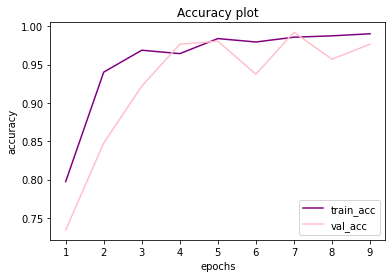

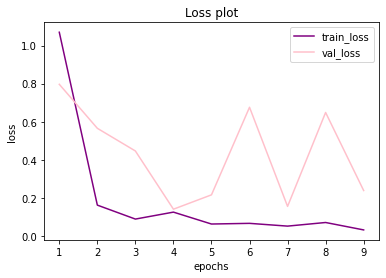

In [ ]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

## <span style="color:blue; font-family:monospace;"> Checking Model Performance</span>

In [ ]:
prediction= model.predict(val_data, steps=np.ceil(val_data.samples/val_data.batch_size), verbose=1)
prediction= (prediction > 0.5)
#prediction

9/9 [==============================] - 9s 826ms/step


In [ ]:
model.evaluate(val_data,verbose = 1)

9/9 [==============================] - 6s 679ms/step - loss: 0.2107 - accuracy: 0.9748


[0.2107115536928177, 0.9748201370239258]

In [ ]:
val_labels=val_data.classes
#val_labels

In [ ]:
prediction.shape

In [ ]:
val_labels.shape

In [ ]:
cm= confusion_matrix(val_data.classes, prediction)
#plot_confusion_matrix(cm, figsize=(5,5))

print(accuracy_score(val_data.classes, prediction))
print(classification_report(val_data.classes, prediction))

0.9856115107913669
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       139
           1       1.00      0.97      0.99       139

    accuracy                           0.99       278
   macro avg       0.99      0.99      0.99       278
weighted avg       0.99      0.99      0.99       278



In [ ]:
model.save("tb_inc_700.h5")